In [198]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy.stats as stats




In [50]:
%matplotlib inline

In [30]:
#read in the cleaned data from csv file
df = pd.read_csv('airbnbdfClean.csv', encoding = 'unicode_escape')
df.sample(5)

,Unnamed: 0,city,house_title,house_type,price,owner_name,no_of_reviews,rating,occupancy,occupancy_lst,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
394,402,Orlando,1 bd nice apartment 10 min from all parks,Entire condominium,75.0,Juan,44,4.5,"['4 guests', '1 bedroom', '2 beds', '1 bath', ...","[""['4 guests'"", "" '1 bedroom'"", "" '2 beds'"", ""...",4.0,'1 bedroom','2 beds','1 bath',1.0,2.0,1.0
244,251,Manhattan,"Beautiful spacious one bedroom, upper east side",Entire apartment,180.0,Julia,92,5.0,"['3 guests', '1 bedroom', '2 beds', '1 bath', ...","[""['3 guests'"", "" '1 bedroom'"", "" '2 beds'"", ""...",3.0,'1 bedroom','2 beds','1 bath',1.0,2.0,1.0
203,210,Manhattan,quaint village apartment for up to 6,Entire apartment,225.0,Jacqueline,69,4.5,"['6 guests', '1 bedroom', '2 beds', '1 bath', ...","[""['6 guests'"", "" '1 bedroom'"", "" '2 beds'"", ""...",6.0,'1 bedroom','2 beds','1 bath',1.0,2.0,1.0
262,269,Manhattan,Fun Unique Spacious Midtown Getaway,Entire apartment,245.0,William,141,4.5,"['6 guests', '1 bedroom', '2 beds', '1 bath', ...","[""['6 guests'"", "" '1 bedroom'"", "" '2 beds'"", ""...",6.0,'1 bedroom','2 beds','1 bath',1.0,2.0,1.0
163,167,Manhattan,"Apt in Little Italy/Chinatown, Lower Manhattan",Entire apartment,180.0,Moying,23,5.0,"['5 guests', '2 bedrooms', '2 beds', '1 bath',...","[""['5 guests'"", "" '2 bedrooms'"", "" '2 beds'"", ...",5.0,'2 bedrooms','2 beds','1 bath',2.0,2.0,1.0


In [31]:
airdf = df[['city','house_title','house_type','price','owner_name','no_of_reviews','rating','no_of_guest','house_size','no_of_beds','no_of_baths','house','beds','bath']]
airdf.sample(5)

,city,house_title,house_type,price,owner_name,no_of_reviews,rating,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
102,Manhattan,"Walk everywhere, See everything! 2BR Midtown West",Private room in apartment,150.0,Julien,98,5.0,7.0,'2 bedrooms','3 beds','1 private bath',2.0,3.0,1.0
271,Manhattan,Lovely Deluxe Studio near Lincoln Center,Entire apartment,191.0,Albar,226,4.5,5.0,'1 bedroom','3 beds','1 bath',1.0,3.0,1.0
24,Manhattan,Near Times Square and Hell's Kitchen,Private room in apartment,140.0,Claude,343,4.5,3.0,'1 bedroom','2 beds','1 shared bath',1.0,2.0,1.0
10,Manhattan,Big renovated studio up to 4 people in Manhattan,Entire apartment,95.0,Gloria,20,4.5,4.0,'Studio','1 bed','1 bath',0.5,1.0,1.0
400,Orlando,"Walmart, universal, outlets and millenia 5 awa...",Entire condominium,41.0,Hector,4,3.5,8.0,'3 bedrooms','7 beds','2 baths',3.0,7.0,2.0


In [33]:
airdf.iloc[111,1]

'Ã¢Â\x9dÂ¤Ã¯Â¸Â\x8f Furnished One Bedroom with Terrace!! Ã¢Â\x98Â\x85Ã¢Â\x98Â\x85Ã¢Â\x98Â\x85Ã¢Â\x98Â\x85Ã¢Â\x98Â\x85'

In [34]:
" ".join(re.findall('[a-zA-Z]+', airdf.iloc[111,1]))

'Furnished One Bedroom with Terrace'

In [273]:
# function to clean weird chars like Â¤Ã¯Â¸Â 
def get_alphabets(s):
    return " ".join(re.findall('[a-zA-Z]+', s))

airdf = airdf.assign(house_title = airdf.house_title.apply(get_alphabets))

airdf = airdf.assign(no_of_guest = airdf.no_of_guest.astype(int))
airdf = airdf.assign(price = airdf.price.astype(int))

In [274]:
airdf

,city,house_title,house_type,price,owner_name,no_of_reviews,rating,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
0,Manhattan,A Beautiful Brownstone Apartment,Entire apartment,91,Michael,279,5.0,4,'Studio','3 beds','1 bath',0.5,3.0,1.0
1,Manhattan,YOUR DREAM SUITE IN MANHATTAN,Private room in apartment,87,Marilyn,137,4.0,4,'1 bedroom','2 beds','1 private bath',1.0,2.0,1.0
2,Manhattan,Manhattan s Best Deal,Entire apartment,165,Adrianne,272,4.5,6,'2 bedrooms','5 beds','1 bath',2.0,5.0,1.0
3,Manhattan,Spacious room near Times Square,Private room in apartment,88,Stephanie,118,4.5,4,'1 bedroom','1 bed','1 shared bath',1.0,1.0,1.0
4,Manhattan,Entire Apartment Steps from Times Square For,Entire apartment,99,Theresa,162,4.5,4,'1 bedroom','2 beds','1 bath',1.0,2.0,1.0
5,Manhattan,Modern Trendy Bedroom Bath Lower Manhattan,Entire apartment,90,Alex,117,5.0,5,'2 bedrooms','3 beds','1 bath',2.0,3.0,1.0
6,Manhattan,LARGE Bedroom Midtown Manhattan Apartment,Entire apartment,124,Ethan,4,5.0,4,'2 bedrooms','2 beds','1 bath',2.0,2.0,1.0
7,Manhattan,Massive DUPLEX BR BATH East Village,Entire apartment,198,Seith,340,4.0,8,'2 bedrooms','4 beds','2 baths',2.0,4.0,2.0
8,Manhattan,Luxury Central Park Apartment close to everything,Entire apartment,199,Bozhena,125,4.5,4,'1 bedroom','4 beds','1 bath',1.0,4.0,1.0
9,Manhattan,GREAT AND STYLISH APARTMENT AMAZING LOCATION,Entire apartment,110,M. Alejandro,100,4.5,3,'1 bedroom','2 beds','1 bath',1.0,2.0,1.0


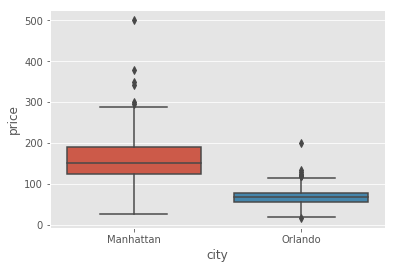

In [40]:
# price analysis by city

sns.boxplot(x = 'city', y= 'price', data=airdf)

Text(0.5, 1.0, 'Price range analysis by City')

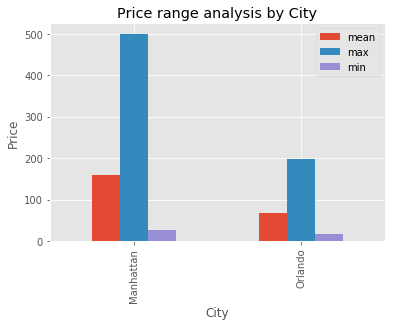

In [225]:
airCityPrice = airdf.groupby('city').agg(['mean','max','min']).price

airCityPrice.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price range analysis by City')

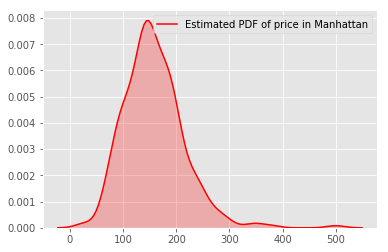

In [172]:
sns.kdeplot(airdf[airdf.city == 'Manhattan'].price, shade=True, color = "red" , label='Estimated PDF of price in Manhattan')

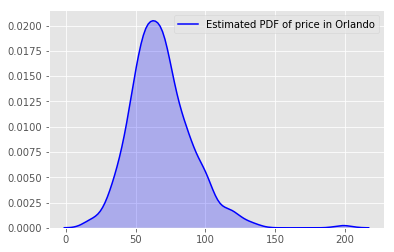

In [173]:
sns.kdeplot(airdf[airdf.city == 'Orlando'].price, shade=True,color="blue", label='Estimated PDF of price in Orlando')

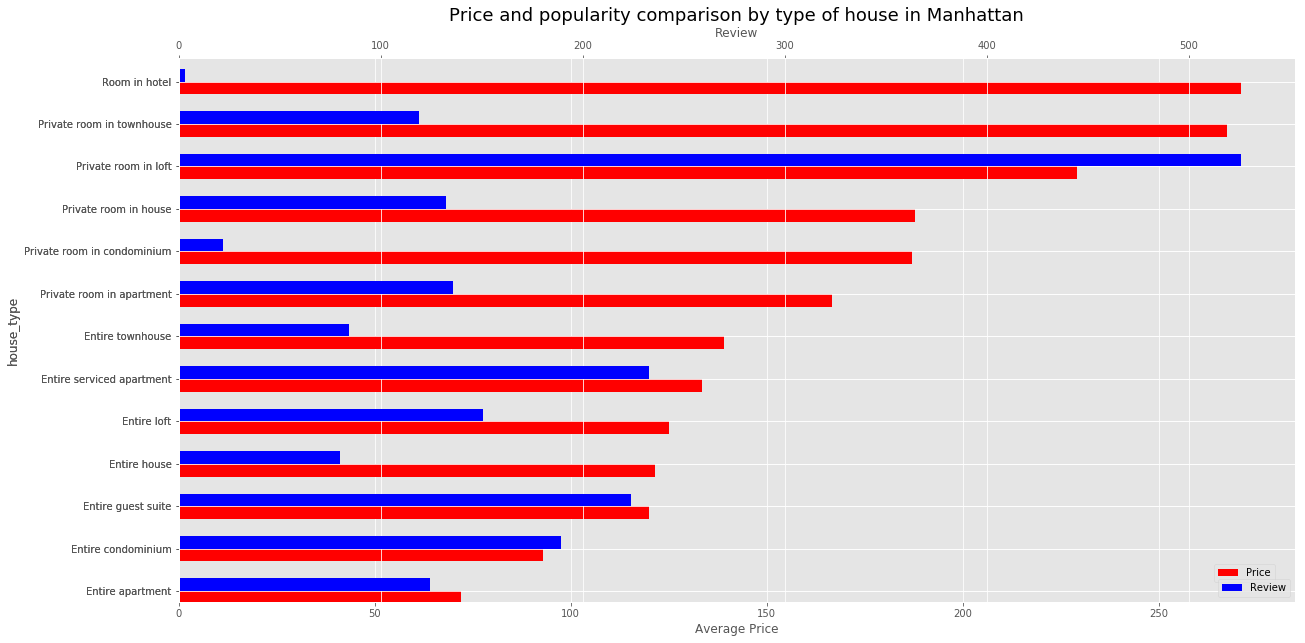

In [232]:
# Plot Price and popularity comparison by type of House in Manhattan

priceManh = airdf[airdf.city == 'Manhattan'].groupby('house_type')['price'].mean()
reviewManh = airdf[airdf.city == 'Manhattan'].groupby('house_type')['no_of_reviews'].mean()

fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(20, 10)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

p1 = priceManh.sort_values(ascending=True).plot(kind='barh', color='red', ax=ax, width=width, position =1, legend = True,label = 'Price')
p2 = reviewManh.plot(kind='barh', color='blue', ax=ax2, width=width, position=0,legend = True,label = 'Review')


ax.set_xlabel('Average Price')
ax2.set_xlabel('Review')
#plt.ylabel('House Type')
plt.title('Price and popularity comparison by type of house in Manhattan', fontsize=18)
ax2.legend(loc = 'lower right')
ax.legend(loc = 'lower right', borderaxespad = 2)
plt.show()

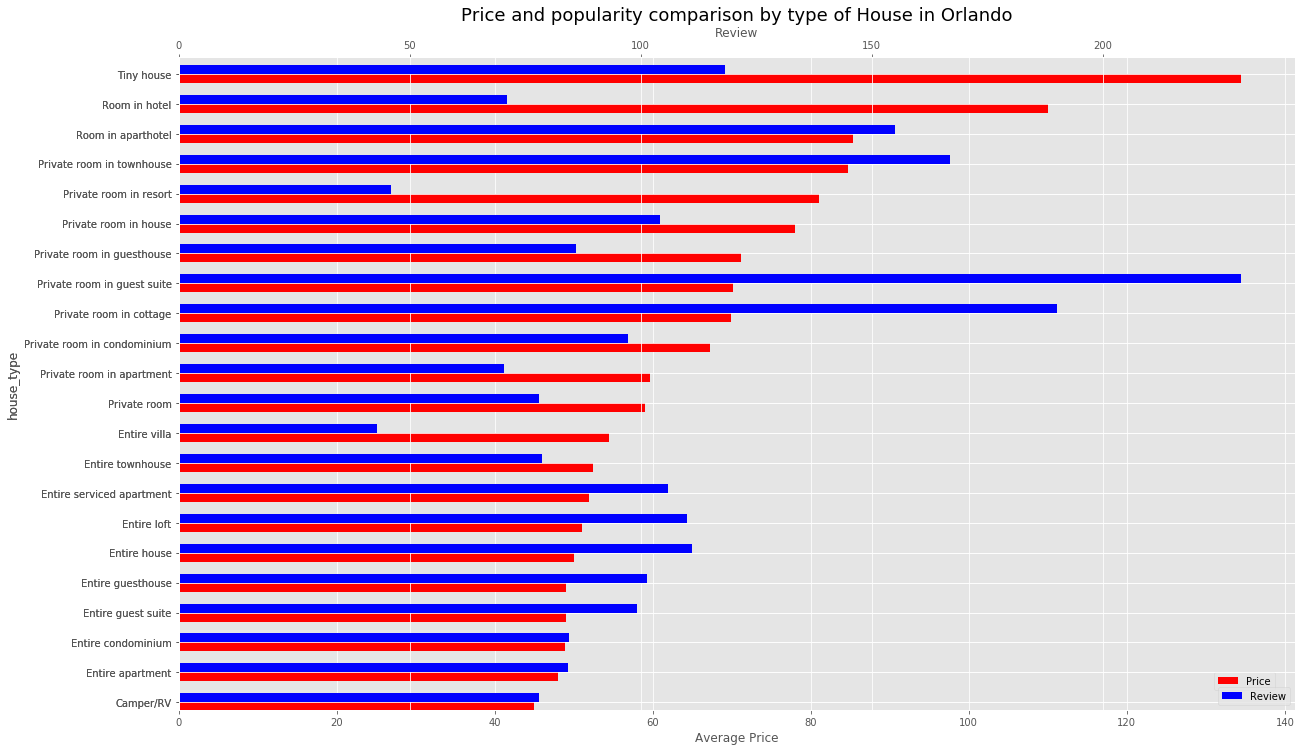

In [233]:
# Plot Price and popularity comparison by type of House in Manhattan

priceOrl = airdf[airdf.city == 'Orlando'].groupby('house_type')['price'].mean()
reviewOrl = airdf[airdf.city == 'Orlando'].groupby('house_type')['no_of_reviews'].mean()

fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(20, 12)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

p1 = priceOrl.sort_values(ascending=True).plot(kind='barh', color='r', ax=ax, width=width, position =1, legend = True,label = 'Price')
p2 = reviewOrl.plot(kind='barh', color='blue', ax=ax2, width=width, position=0,legend = True,label = 'Review')


ax.set_xlabel('Average Price')
ax2.set_xlabel('Review')
#plt.ylabel('House Type')
plt.title('Price and popularity comparison by type of House in Orlando', fontsize=18)
ax2.legend(loc = 'lower right')
ax.legend(loc = 'lower right', borderaxespad = 2)
plt.show()

Text(0.5, 1.0, 'How many guest can this house accomodate?')

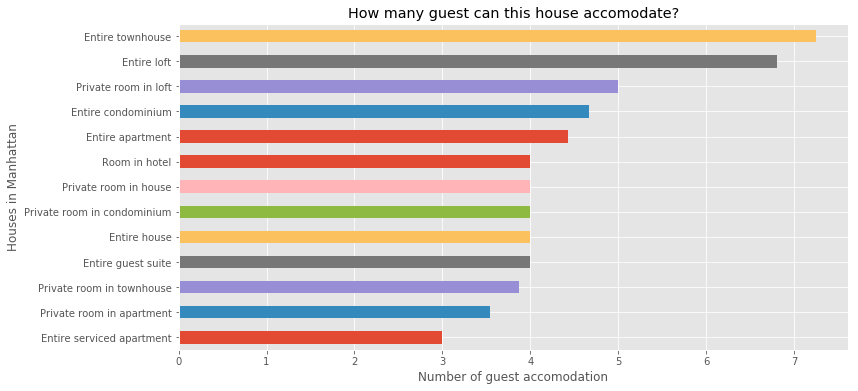

In [157]:
# type analysis in Manhattan by house size

plt.figure(figsize=(12,6))
airdf[airdf.city == 'Manhattan'].groupby('house_type')['no_of_guest'].mean().sort_values().plot(kind='barh')
plt.xlabel('Number of guest accomodation')
plt.ylabel('Houses in Manhattan')
plt.title('How many guest can this house accomodate?')

Text(0.5, 1.0, 'How many guest can this house accomodate?')

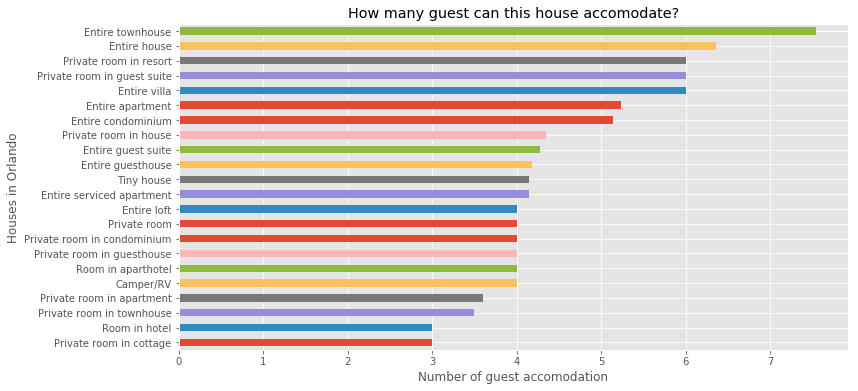

In [159]:
# type analysis in Manhattan by house size

plt.figure(figsize=(12,6))
airdf[airdf.city == 'Orlando'].groupby('house_type')['no_of_guest'].mean().sort_values().plot(kind='barh')
plt.xlabel('Number of guest accomodation')
plt.ylabel('Houses in Orlando')
plt.title('How many guest can this house accomodate?')

Text(0, 0.5, 'Houses in Manhattan')

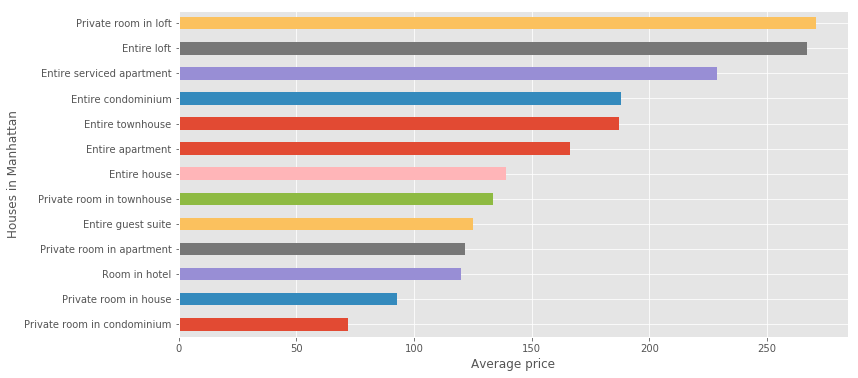

In [60]:
# test not to be used in presentation
# price analysis in Manhattan by house type

plt.figure(figsize=(12,6))
airdf[airdf.city == 'Manhattan'].groupby('house_type')['price'].mean().sort_values().plot(kind='barh')
plt.xlabel('Average price')
plt.ylabel('Houses in Manhattan')



Text(0, 0.5, 'Houses in Orlando')

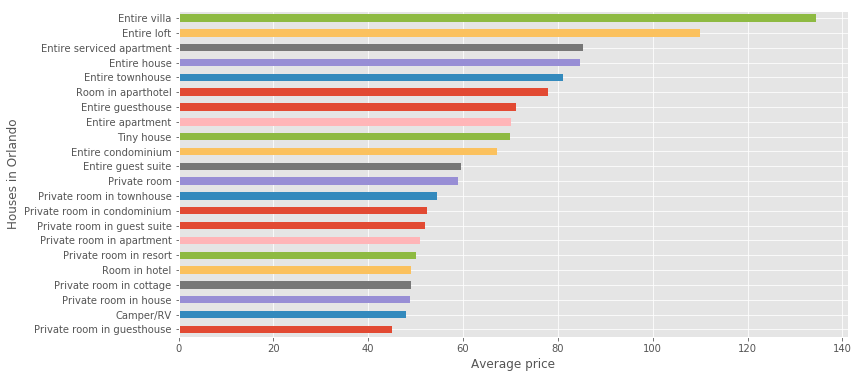

In [61]:
# test not to be used in presentation
# price analysis in Orlando by house type

plt.figure(figsize=(12,6))
airdf[airdf.city == 'Orlando'].groupby('house_type')['price'].mean().sort_values().plot(kind='barh')
plt.xlabel('Average price')
plt.ylabel('Houses in Orlando')

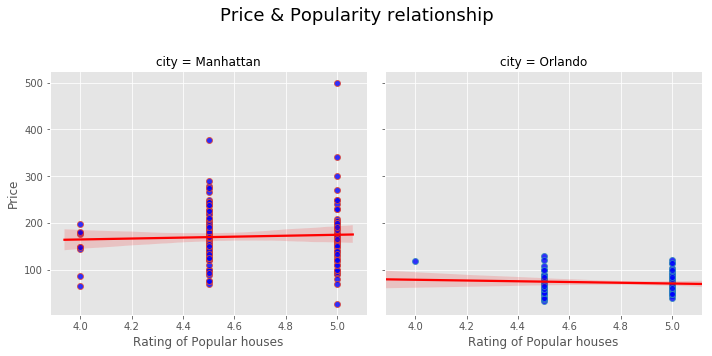

In [74]:
lmplt = sns.lmplot(x = 'rating', y= 'price', data=airdf[airdf.no_of_reviews > np.mean(airdf.no_of_reviews)], hue="city",
          line_kws={'color': 'red'},fit_reg = True,scatter_kws={'facecolors':'blue'}, col = 'city')
lmplt = lmplt.set_axis_labels("Rating of Popular houses", "Price")
fig = lmplt.fig
fig.suptitle("Price & Popularity relationship", fontsize=18)
lmplt.fig.subplots_adjust(top=.8)

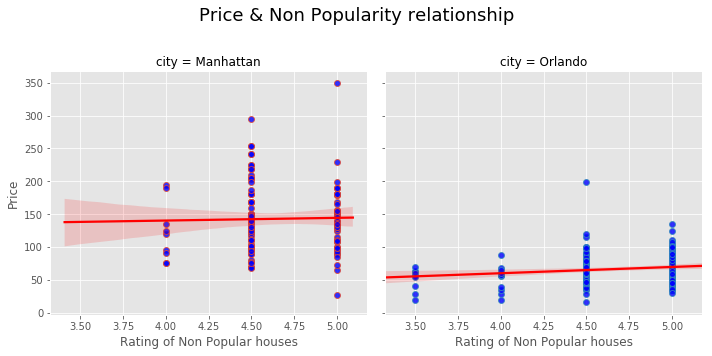

In [76]:
lmplt = sns.lmplot(x = 'rating', y= 'price', data=airdf[airdf.no_of_reviews <= np.mean(airdf.no_of_reviews)], hue="city",
          line_kws={'color': 'red'},fit_reg = True,scatter_kws={'facecolors':'blue'}, col = 'city')
lmplt = lmplt.set_axis_labels("Rating of Non Popular houses", "Price")
fig = lmplt.fig
fig.suptitle("Price & Non Popularity relationship", fontsize=18)
lmplt.fig.subplots_adjust(top=.8)

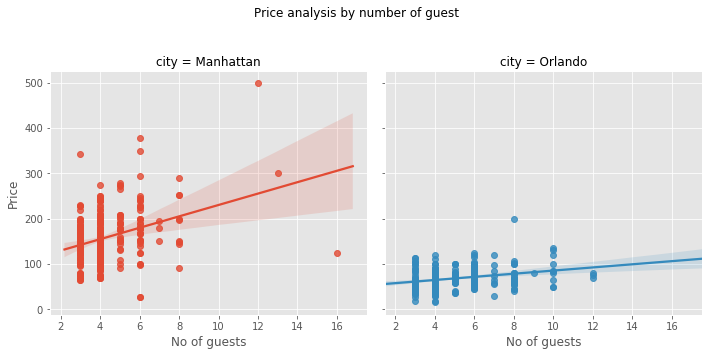

In [187]:
# price analysis by number of guest the house can accomodate for both cities

guestPrice = sns.lmplot(x = 'no_of_guest', y= 'price', data=airdf, hue="city", col = 'city')

plt.subplots_adjust(top=0.8)
guestPrice.fig.suptitle('Price analysis by number of guest')
guestPrice.set_axis_labels('No of guests', 'Price')


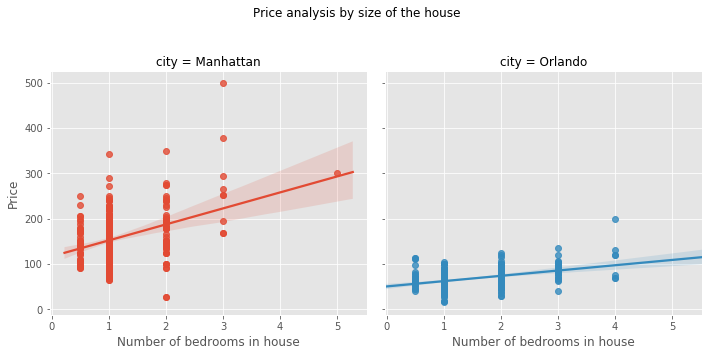

In [188]:
# price analysis by size of the house for both cities

houseSizePrice = sns.lmplot(x = 'house', y= 'price', data=airdf, hue="city", col = 'city')
plt.subplots_adjust(top=0.8)
houseSizePrice.fig.suptitle('Price analysis by size of the house')
houseSizePrice.set_axis_labels('Number of bedrooms in house', 'Price')

In [133]:
# for test, might not use in presentation
# Size and type of most popular houses
airManh = airdf[airdf.city == 'Manhattan'] 
no_of_revw = airManh.no_of_reviews.sort_values(ascending = False).nlargest(10)
airManh[airManh.no_of_reviews.isin(no_of_revw) ]

,city,house_title,house_type,price,owner_name,no_of_reviews,rating,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
7,Manhattan,Massive DUPLEX BR BATH East Village,Entire apartment,198.0,Seith,340,4.0,8.0,'2 bedrooms','4 beds','2 baths',2.0,4.0,2.0
12,Manhattan,Spacious Room in East Village NoHo,Private room in apartment,129.0,Sne,381,5.0,3.0,'1 bedroom','1 bed','1 shared bath',1.0,1.0,1.0
13,Manhattan,Manhattan Lux Loft Like Love Lots Look,Private room in loft,271.0,Carol,526,5.0,5.0,'1 bedroom','3 beds','1 private bath',1.0,3.0,1.0
24,Manhattan,Near Times Square and Hell s Kitchen,Private room in apartment,140.0,Claude,343,4.5,3.0,'1 bedroom','2 beds','1 shared bath',1.0,2.0,1.0
36,Manhattan,Soho Apartment Stylish Central,Entire condominium,190.0,Arne,346,4.5,4.0,'1 bedroom','1 bed','1 bath',1.0,1.0,1.0
90,Manhattan,Best of SOHO Gorgeous bedroom,Entire condominium,275.0,Arne,343,4.5,5.0,'2 bedrooms','2 beds','1 bath',2.0,2.0,1.0
98,Manhattan,AMAZING BR TIME SQUARE SLEEPS,Entire apartment,200.0,E. M.,324,4.5,4.0,'1 bedroom','1 bed','1 bath',1.0,1.0,1.0
125,Manhattan,TriBeCa Sq Ft w Priv Elevator,Entire loft,500.0,Chester & Jon,431,5.0,12.0,'3 bedrooms','3 beds','2 baths',3.0,3.0,2.0
128,Manhattan,private bedroom w private bathroom on Central ...,Private room in apartment,160.0,Arlette,315,4.5,3.0,'1 bedroom','2 beds','1 private bath',1.0,2.0,1.0
273,Manhattan,Big st Meal Kind Host Ace Space,Private room in apartment,134.0,Nancy,314,4.5,3.0,'2 bedrooms','3 beds','1 shared bath',2.0,3.0,1.0


In [275]:
airdf[airdf.city=='Manhattan'].corr()

,price,no_of_reviews,rating,no_of_guest,house,beds,bath
price,1.000000,0.279812,0.025379,0.337086,0.372719,0.243942,0.057633
no_of_reviews,0.279812,1.000000,-0.057659,0.064894,0.058067,0.024947,0.032129
rating,0.025379,-0.057659,1.000000,-0.050120,-0.051072,-0.041858,0.105692
no_of_guest,0.337086,0.064894,-0.050120,1.000000,0.606750,0.511615,0.318634
house,0.372719,0.058067,-0.051072,0.606750,1.000000,0.490566,0.329886
beds,0.243942,0.024947,-0.041858,0.511615,0.490566,1.000000,0.233941
bath,0.057633,0.032129,0.105692,0.318634,0.329886,0.233941,1.000000


In [276]:
airdf[airdf.city=='Orlando'].corr()

,price,no_of_reviews,rating,no_of_guest,house,beds,bath
price,1.000000,0.132779,0.128376,0.293177,0.437949,0.260266,0.216046
no_of_reviews,0.132779,1.000000,0.169497,-0.106381,-0.079053,-0.095949,-0.066396
rating,0.128376,0.169497,1.000000,-0.242792,-0.079336,-0.129423,-0.113679
no_of_guest,0.293177,-0.106381,-0.242792,1.000000,0.705247,0.784932,0.379696
house,0.437949,-0.079053,-0.079336,0.705247,1.000000,0.676236,0.418139
beds,0.260266,-0.095949,-0.129423,0.784932,0.676236,1.000000,0.292868
bath,0.216046,-0.066396,-0.113679,0.379696,0.418139,0.292868,1.000000


C:\Users\priya\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


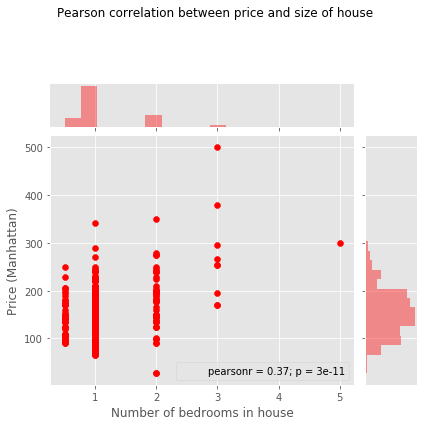

In [208]:
# we see "pearsonr=0.37" which indicates the pearson correlation of these two variables.
#However, we also see the p value is pretty small, 
#which indicates that there is a significant linear relation between the two variables

jplotManh = sns.jointplot(airdf[airdf.city=='Manhattan'].house, airdf[airdf.city=='Manhattan'].price, color = 'red')
jplotManh.annotate(stats.pearsonr)
plt.subplots_adjust(top=0.8)
jplotManh.fig.suptitle('Pearson correlation between price and size of house')
jplotManh.set_axis_labels('Number of bedrooms in house', 'Price (Manhattan)')
plt.show()

C:\Users\priya\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


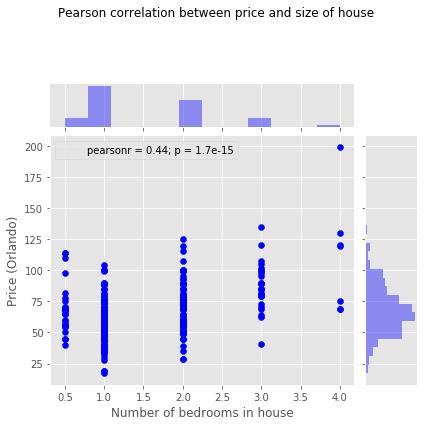

In [209]:
# we see "pearsonr=0.44" which indicates the pearson correlation of these two variables.
#However, we also see the p value is pretty small, 
#which indicates that there is a significant linear relation between the two variables

jplotOrl = sns.jointplot(airdf[airdf.city=='Orlando'].house, airdf[airdf.city=='Orlando'].price, color = 'blue')
jplotOrl.annotate(stats.pearsonr)
plt.subplots_adjust(top=0.8)
jplotOrl.fig.suptitle('Pearson correlation between price and size of house')
jplotOrl.set_axis_labels('Number of bedrooms in house', 'Price (Orlando)')
plt.show()

In [210]:
#read in the cleaned data from csv file
dfh = pd.read_csv('hoteldfclean.csv', encoding = 'unicode_escape')
dfh = dfh.assign(no_of_ratings = dfh.no_of_ratings.astype(int))
hoteldf = dfh[['city','hotel_name','acc_type','price','hotel_star','no_of_ratings','rating','occupancy','no_of_rooms','no_of_guests']]

hoteldf.sample(5)

,city,hotel_name,acc_type,price,hotel_star,no_of_ratings,rating,occupancy,no_of_rooms,no_of_guests
479,Manhattan,"Hyatt Centric Times Square New York, New York",HOTEL,219,4.5,1718,4.5,"1 room, 3 adults",1,3
529,Manhattan,"The Bowery House, New York",HOTEL,109,2.0,259,3.1,"1 room, 3 adults",1,3
94,Orlando,"Holiday Inn Orlando East - UCF Area, Orlando",HOTEL,96,3.5,365,4.4,"1 room, 3 adults",1,3
495,Manhattan,"Park Central Hotel New York, New York",HOTEL,95,4.0,4203,3.9,"1 room, 3 adults",1,3
382,Manhattan,Courtyard by Marriott New York Manhattan / Che...,HOTEL,127,3.5,558,4.5,"1 room, 3 adults",1,3


In [212]:
# two-sample t-test is used to test the hypothesis that the populations from which the two samples were taken have the same mean
# two sample T test for price of airbnb and hotel

stats.ttest_ind(airdf.price, hoteldf.price)

# Test Result Ttest_indResult(statistic=-6.462759938122756, pvalue=1.482752809922366e-10)

#In this case, the p-value is extremely small. This indicates the populations from hotel price and airbnb price are taken; are unlikely to have the same mean
# Hotel price and airbnb price are statically different

Ttest_indResult(statistic=-6.462759938122756, pvalue=1.482752809922366e-10)

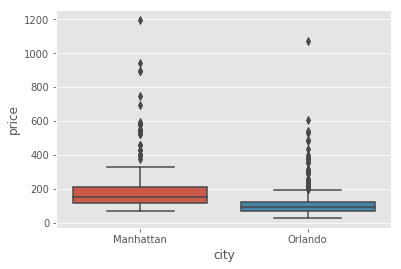

In [213]:
# price analysis by city

sns.boxplot(x = 'city', y= 'price', data=hoteldf, order = ["Manhattan", "Orlando"])

Text(0.5, 1.0, 'Price range analysis by City')

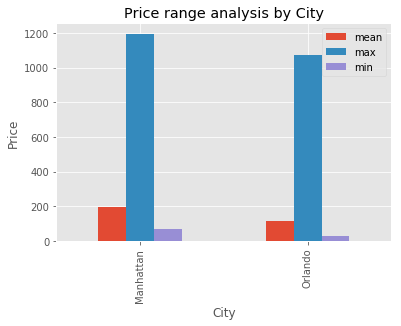

In [224]:
hotCityPrice = hoteldf.groupby('city').agg(['mean','max','min']).price

hotCityPrice.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price range analysis by City')

C:\Users\priya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


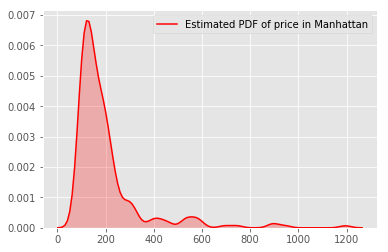

In [227]:
sns.kdeplot(hoteldf[hoteldf.city == 'Manhattan'].price, shade=True, color = "red" , label='Estimated PDF of price in Manhattan')

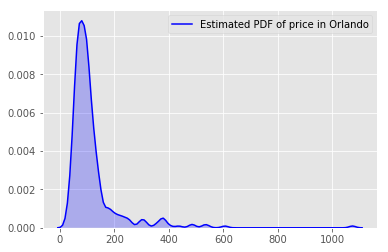

In [228]:
sns.kdeplot(hoteldf[hoteldf.city == 'Orlando'].price, shade=True,color="blue", label='Estimated PDF of price in Orlando')

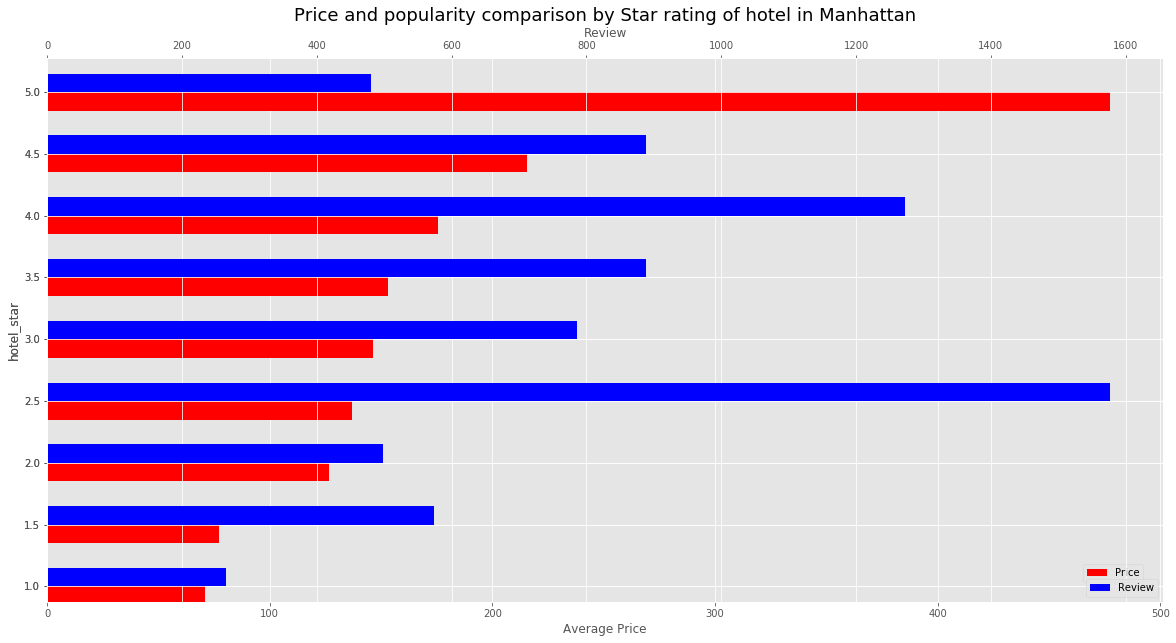

In [235]:
# Plot Price and popularity comparison by type of Hotel in Manhattan

priceHotManh = hoteldf[hoteldf.city == 'Manhattan'].groupby('hotel_star')['price'].mean()
reviewHotManh = hoteldf[hoteldf.city == 'Manhattan'].groupby('hotel_star')['no_of_ratings'].mean()

fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(20, 10)

axh = fig.add_subplot(111) # Create matplotlib axes
axh2 = axh.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

ph1 = priceHotManh.sort_values(ascending=True).plot(kind='barh', color='red', ax=axh, width=width, position =1, legend = True,label = 'Price')
ph2 = reviewHotManh.plot(kind='barh', color='blue', ax=axh2, width=width, position=0,legend = True,label = 'Review')


axh.set_xlabel('Average Price')
axh2.set_xlabel('Review')
#plt.ylabel('House Type')
plt.title('Price and popularity comparison by Star rating of hotel in Manhattan', fontsize=18)
axh2.legend(loc = 'lower right')
axh.legend(loc = 'lower right', borderaxespad = 2)
plt.show()

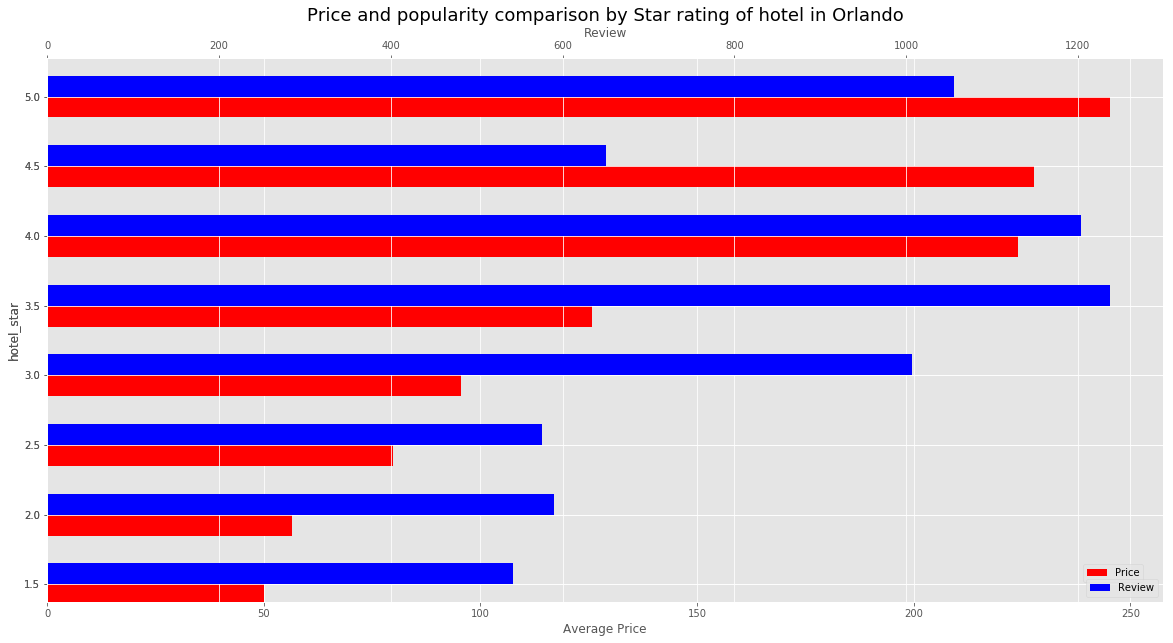

In [236]:
# Plot Price and popularity comparison by type of Hotel in Orlando

priceHotOrl = hoteldf[hoteldf.city == 'Orlando'].groupby('hotel_star')['price'].mean()
reviewHotOrl = hoteldf[hoteldf.city == 'Orlando'].groupby('hotel_star')['no_of_ratings'].mean()

fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(20, 10)

axh = fig.add_subplot(111) # Create matplotlib axes
axh2 = axh.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

ph1 = priceHotOrl.sort_values(ascending=True).plot(kind='barh', color='red', ax=axh, width=width, position =1, legend = True,label = 'Price')
ph2 = reviewHotOrl.plot(kind='barh', color='blue', ax=axh2, width=width, position=0,legend = True,label = 'Review')


axh.set_xlabel('Average Price')
axh2.set_xlabel('Review')
#plt.ylabel('House Type')
plt.title('Price and popularity comparison by Star rating of hotel in Orlando', fontsize=18)
axh2.legend(loc = 'lower right')
axh.legend(loc = 'lower right', borderaxespad = 2)
plt.show()

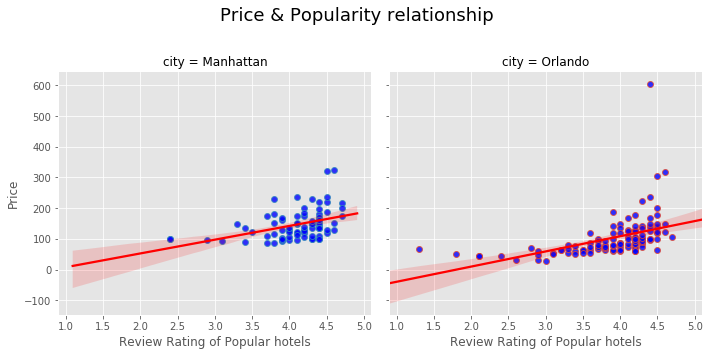

In [254]:
lmplt = sns.lmplot(x = 'rating', y= 'price', data=hoteldf[hoteldf.no_of_ratings > np.mean(hoteldf.no_of_ratings)], hue="city", 
          line_kws={'color': 'red'},fit_reg = True,scatter_kws={'facecolors':'blue'}, col = 'city', col_order=["Manhattan", "Orlando"])
lmplt = lmplt.set_axis_labels("Review Rating of Popular hotels", "Price")

fig = lmplt.fig
fig.suptitle("Price & Popularity relationship", fontsize=18)
lmplt.fig.subplots_adjust(top=.8)

C:\Users\priya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


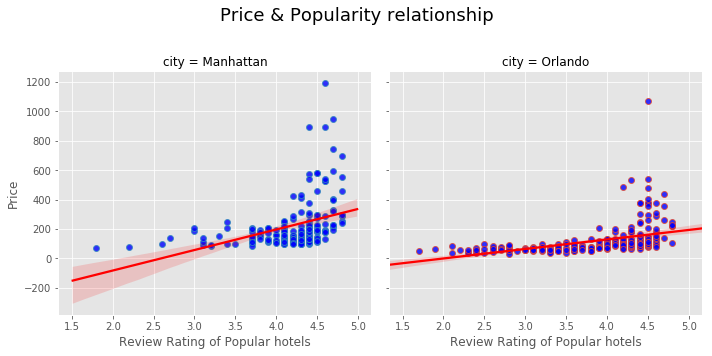

In [253]:
lmplt = sns.lmplot(x = 'rating', y= 'price', data=hoteldf[hoteldf.no_of_ratings <= np.mean(hoteldf.no_of_ratings)], hue="city",
          line_kws={'color': 'red'},fit_reg = True,scatter_kws={'facecolors':'blue'}, col = 'city', col_order=["Manhattan", "Orlando"])
lmplt = lmplt.set_axis_labels("Review Rating of Popular hotels", "Price")

fig = lmplt.fig
fig.suptitle("Price & Popularity relationship", fontsize=18)
lmplt.fig.subplots_adjust(top=.8)

In [255]:
hoteldf.corr()

,price,hotel_star,no_of_ratings,rating,no_of_rooms,no_of_guests
price,1.000000,0.585955,-0.146935,0.411829,NaN,NaN
hotel_star,0.585955,1.000000,0.102518,0.598980,NaN,NaN
no_of_ratings,-0.146935,0.102518,1.000000,-0.094030,NaN,NaN
rating,0.411829,0.598980,-0.094030,1.000000,NaN,NaN
no_of_rooms,NaN,NaN,NaN,NaN,NaN,NaN
no_of_guests,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\priya\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


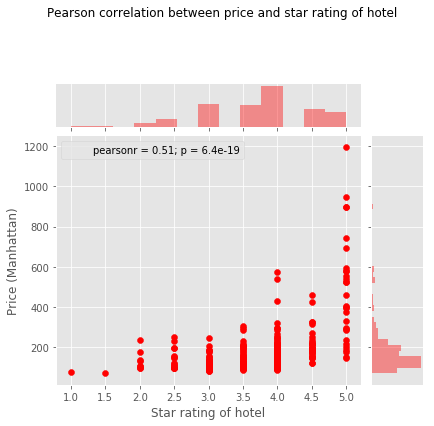

In [258]:
# we see "pearsonr=0.51" which indicates the pearson correlation of these two variables.
#However, we also see the p value is pretty small, 
#which indicates that there is a significant linear relation between the two variables

jplotHotManh = sns.jointplot(hoteldf[hoteldf.city=='Manhattan'].hotel_star, hoteldf[hoteldf.city=='Manhattan'].price, color = 'red')
jplotHotManh.annotate(stats.pearsonr)
plt.subplots_adjust(top=0.8)
jplotHotManh.fig.suptitle('Pearson correlation between price and star rating of hotel')
jplotHotManh.set_axis_labels('Star rating of hotel', 'Price (Manhattan)')
plt.show()

C:\Users\priya\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


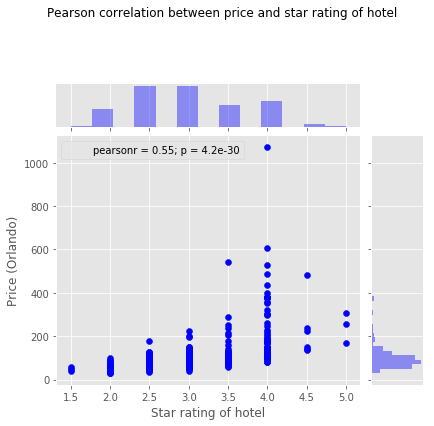

In [259]:
# we see "pearsonr=0.55" which indicates the pearson correlation of these two variables.
#However, we also see the p value is pretty small, 
#which indicates that there is a significant linear relation between the two variables

jplotHotOrl = sns.jointplot(hoteldf[hoteldf.city=='Orlando'].hotel_star, hoteldf[hoteldf.city=='Orlando'].price, color = 'blue')
jplotHotOrl.annotate(stats.pearsonr)
plt.subplots_adjust(top=0.8)
jplotHotOrl.fig.suptitle('Pearson correlation between price and star rating of hotel')
jplotHotOrl.set_axis_labels('Star rating of hotel', 'Price (Orlando)')
plt.show()

C:\Users\priya\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


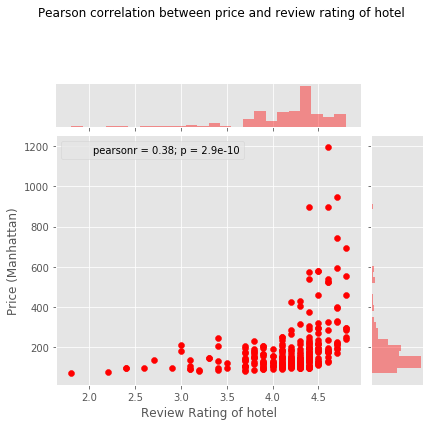

In [260]:
# we see "pearsonr=0.38" which indicates the pearson correlation of these two variables.
#However, we also see the p value is pretty small, 
#which indicates that there is a significant linear relation between the two variables

jplotHotManh = sns.jointplot(hoteldf[hoteldf.city=='Manhattan'].rating, hoteldf[hoteldf.city=='Manhattan'].price, color = 'red')
jplotHotManh.annotate(stats.pearsonr)
plt.subplots_adjust(top=0.8)
jplotHotManh.fig.suptitle('Pearson correlation between price and review rating of hotel')
jplotHotManh.set_axis_labels('Review Rating of hotel', 'Price (Manhattan)')
plt.show()

C:\Users\priya\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


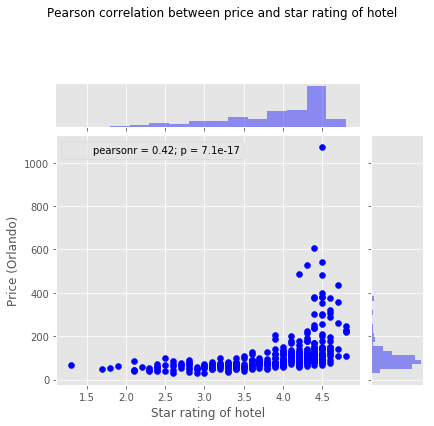

In [261]:
# we see "pearsonr=0.55" which indicates the pearson correlation of these two variables.
#However, we also see the p value is pretty small, 
#which indicates that there is a significant linear relation between the two variables

jplotHotOrl = sns.jointplot(hoteldf[hoteldf.city=='Orlando'].rating, hoteldf[hoteldf.city=='Orlando'].price, color = 'blue')
jplotHotOrl.annotate(stats.pearsonr)
plt.subplots_adjust(top=0.8)
jplotHotOrl.fig.suptitle('Pearson correlation between price and review rating of hotel')
jplotHotOrl.set_axis_labels('Review rating of hotel', 'Price (Orlando)')
plt.show()

In [306]:
air_hotel = airdf[airdf.city == 'Manhattan'][[ 'house_type', 'price', 'no_of_guest']]
air_hotel.columns = ['acc_type', 'price', 'no_of_guests']
air_hotel.sample(5)

,acc_type,price,no_of_guests
250,Private room in apartment,195,3
293,Entire apartment,150,3
142,Entire apartment,200,6
211,Entire apartment,91,4
174,Private room in apartment,110,4


In [287]:
hoteldf.sample(3)

,city,hotel_name,acc_type,price,hotel_star,no_of_ratings,rating,occupancy,no_of_rooms,no_of_guests
237,Orlando,"Monumental Movieland Hotel Orlando, Orlando",HOTEL,54,3.0,584,3.0,"1 room, 3 adults",1,3
617,Manhattan,"The Gregory Hotel, New York",HOTEL,135,4.0,1009,4.0,"1 room, 3 adults",1,3
511,Manhattan,"Omni Berkshire Place, New York",HOTEL,197,4.5,1322,4.4,"1 room, 3 adults",1,3


In [292]:
hotelNewdf = hoteldf[hoteldf.city == 'Manhattan'][['acc_type', 'price', 'no_of_guests', 'hotel_star']]
hotelNewdf.sample(2)

,acc_type,price,no_of_guests,hotel_star
490,HOTEL,110,3,2.5
550,HOTEL,524,3,5.0


In [300]:
hotelNewdf.hotel_star = hotelNewdf.hotel_star.astype(str)
hotelNewdf['hotelRatng'] = hotelNewdf[['acc_type', 'hotel_star']].apply(lambda x: '_'.join(x), axis=1)
hotelNewdf.sample(5)

,acc_type,price,no_of_guests,hotel_star,hotelRatng
529,HOTEL,109,3,2.0,HOTEL_2.0
368,HOTEL,459,3,4.5,HOTEL_4.5
444,HOTEL,179,3,3.5,HOTEL_3.5
576,HOTEL,429,3,4.0,HOTEL_4.0
600,HOTEL,109,3,3.5,HOTEL_3.5


In [303]:
hotelNewdf = hotelNewdf[['hotelRatng','price', 'no_of_guests']]
hotelNewdf.columns = ['acc_type', 'price', 'no_of_guests']
hotelNewdf.sample(5)

,acc_type,price,no_of_guests
439,HOTEL_3.0,104,3
490,HOTEL_2.5,110,3
622,HOTEL_3.5,286,3
540,HOTEL_4.0,158,3
612,HOTEL_4.0,124,3


In [307]:
air_hotel = air_hotel.append(hotelNewdf)
air_hotel.sample(5)

,acc_type,price,no_of_guests
221,Entire apartment,241,6
518,HOTEL_4.0,143,3
408,HOTEL_3.0,110,3
458,HOTEL_4.0,251,3
256,Entire apartment,149,4


In [312]:
air_hotel.sample(5)

,acc_type,price,no_of_guests
105,Entire apartment,120,4
392,HOTEL_5.0,595,3
599,HOTEL_3.0,99,3
520,HOTEL_4.0,224,3
253,Entire apartment,245,4


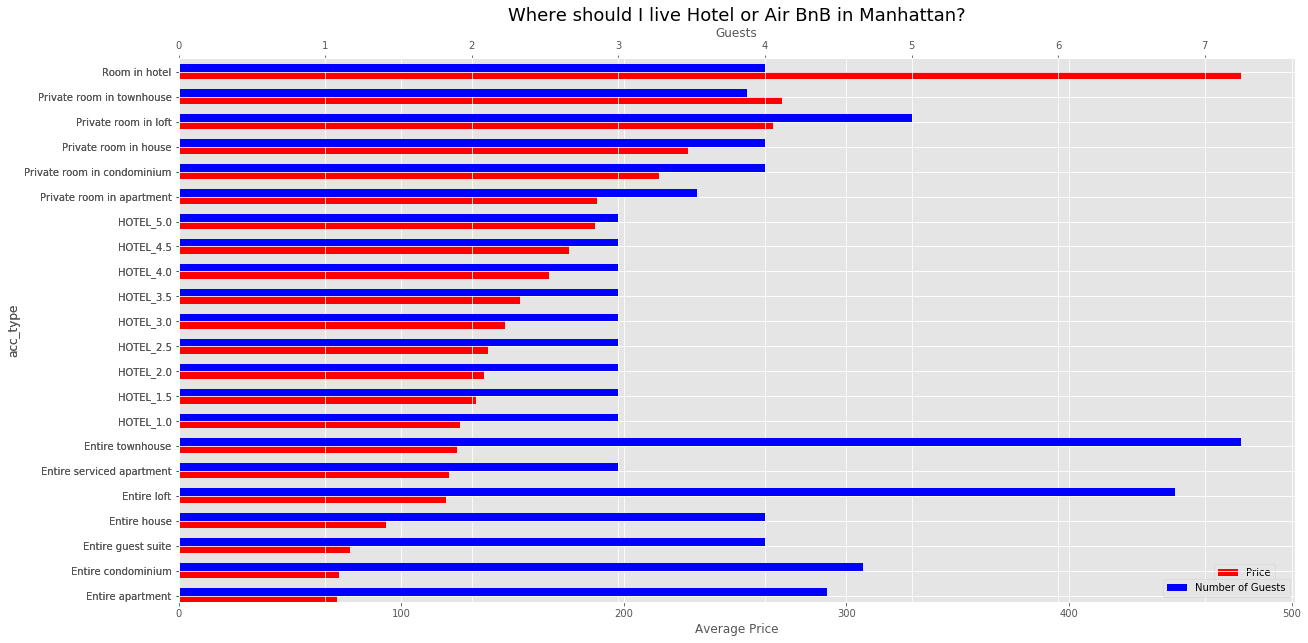

In [314]:
# what is better for me? hotel or airbnb based on my budget and number of guests

# Plot Price and popularity comparison by type of House in Manhattan

priceManh = air_hotel.groupby('acc_type')['price'].mean()
guestManh = air_hotel.groupby('acc_type')['no_of_guests'].mean()

fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(20, 10)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

p1 = priceManh.sort_values(ascending=True).plot(kind='barh', color='red', ax=ax, width=width, position =1, legend = True,label = 'Price')
p2 = guestManh.plot(kind='barh', color='blue', ax=ax2, width=width, position=0,legend = True,label = 'Number of Guests')


ax.set_xlabel('Average Price')
ax2.set_xlabel('Guests')
#plt.ylabel('House Type')
plt.title('Where should I live Hotel or Air BnB in Manhattan?', fontsize=18)
ax2.legend(loc = 'lower right')
ax.legend(loc = 'lower right', borderaxespad = 2)
plt.show()

In [315]:
air_hotel_Orl = airdf[airdf.city == 'Orlando'][[ 'house_type', 'price', 'no_of_guest']]
air_hotel_Orl.columns = ['acc_type', 'price', 'no_of_guests']
air_hotel_Orl.sample(5)

,acc_type,price,no_of_guests
592,Private room in house,30,4
436,Entire apartment,58,7
484,Entire guest suite,74,4
540,Entire condominium,59,4
535,Entire apartment,64,4


In [316]:
hotelOrldf = hoteldf[hoteldf.city == 'Orlando'][['acc_type', 'price', 'no_of_guests', 'hotel_star']]
hotelOrldf.sample(2)

,acc_type,price,no_of_guests,hotel_star
34,HOTEL,84,3,3.0
109,HOTEL,51,3,2.5


In [318]:
hotelOrldf.hotel_star = hotelOrldf.hotel_star.astype(str)
hotelOrldf['hotelRatng'] = hotelOrldf[['acc_type', 'hotel_star']].apply(lambda x: '_'.join(x), axis=1)
hotelOrldf.sample(5)

,acc_type,price,no_of_guests,hotel_star,hotelRatng
212,HOTEL,99,3,3.0,HOTEL_3.0
70,HOTEL,99,3,3.5,HOTEL_3.5
235,HOTEL,89,3,3.0,HOTEL_3.0
148,HOTEL,75,3,3.0,HOTEL_3.0
146,HOTEL,63,3,2.5,HOTEL_2.5


In [319]:
hotelOrldf = hotelOrldf[['hotelRatng','price', 'no_of_guests']]
hotelOrldf.columns = ['acc_type', 'price', 'no_of_guests']
hotelOrldf.sample(5)

,acc_type,price,no_of_guests
238,HOTEL_3.0,89,3
258,HOTEL_3.5,119,3
270,HOTEL_2.5,179,3
271,HOTEL_4.0,119,3
79,HOTEL_3.5,290,3


In [320]:
air_hotel_Orl = air_hotel_Orl.append(hotelOrldf)
air_hotel_Orl.sample(5)

,acc_type,price,no_of_guests
122,HOTEL_2.5,84,3
45,HOTEL_4.0,436,3
97,HOTEL_2.0,68,3
372,Entire guest suite,50,3
160,HOTEL_2.0,61,3


In [322]:
air_hotel_Orl.sample(5)

,acc_type,price,no_of_guests
541,Entire guest suite,39,3
386,Entire apartment,55,6
77,HOTEL_4.0,95,3
12,HOTEL_2.5,89,3
177,HOTEL_3.0,92,3


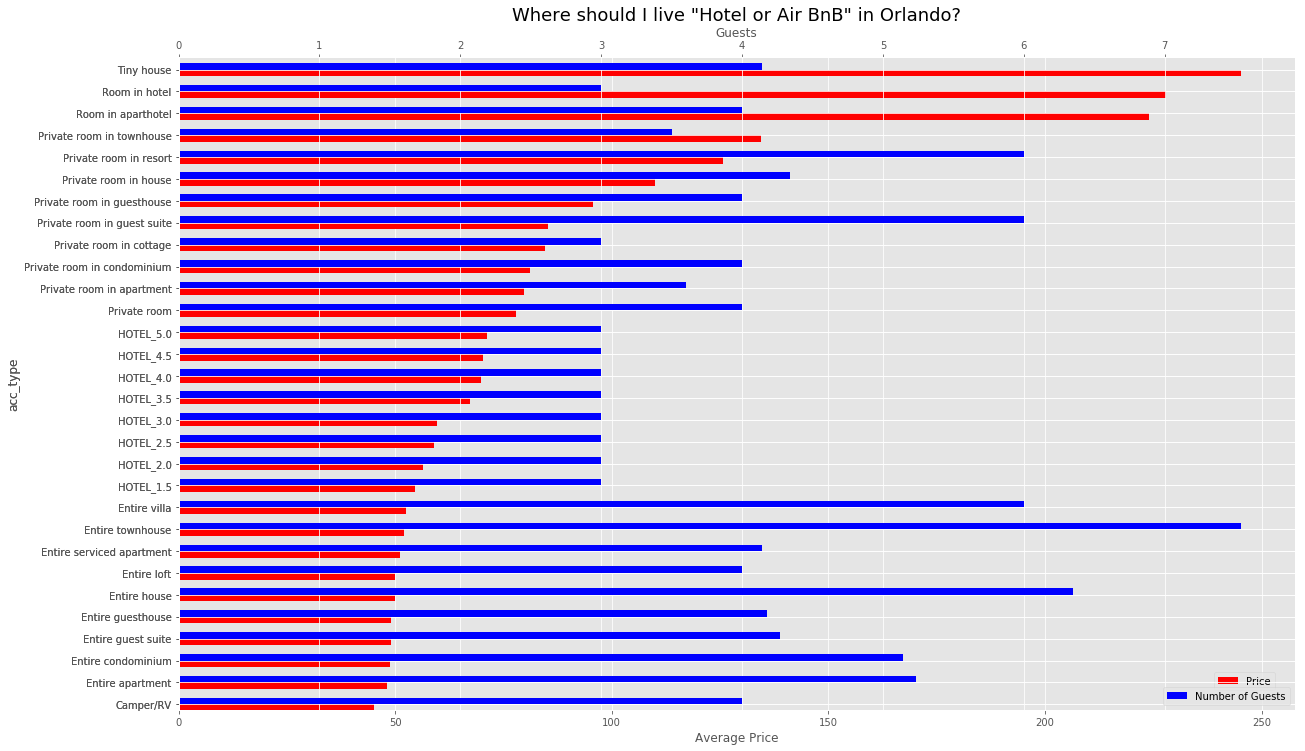

In [324]:
# what is better for me? hotel or airbnb based on my budget and number of guests

# Plot Price and popularity comparison by type of House in Manhattan

priceOrl = air_hotel_Orl.groupby('acc_type')['price'].mean()
guestOrl = air_hotel_Orl.groupby('acc_type')['no_of_guests'].mean()

fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(20, 12)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

p1 = priceOrl.sort_values(ascending=True).plot(kind='barh', color='red', ax=ax, width=width, position =1, legend = True,label = 'Price')
p2 = guestOrl.plot(kind='barh', color='blue', ax=ax2, width=width, position=0,legend = True,label = 'Number of Guests')


ax.set_xlabel('Average Price')
ax2.set_xlabel('Guests')
#plt.ylabel('House Type')
plt.title('Where should I live "Hotel or Air BnB" in Orlando?', fontsize=18)
ax2.legend(loc = 'lower right')
ax.legend(loc = 'lower right', borderaxespad = 2)
plt.show()